
--- Analysis for BEML ---

Head:
         Date    Open     High      Low    Last    Close  \
0  2010-01-04  1121.0  1151.00  1121.00  1134.0  1135.60   
1  2010-01-05  1146.8  1149.00  1128.75  1135.0  1134.60   
2  2010-01-06  1140.0  1164.25  1130.05  1137.0  1139.60   
3  2010-01-07  1142.0  1159.40  1119.20  1141.0  1144.15   
4  2010-01-08  1156.0  1172.00  1140.00  1141.2  1144.05   

   Total Trade Quantity  Turnover (Lacs)  
0              101651.0          1157.18  
1               59504.0           676.47  
2              128908.0          1482.84  
3              117871.0          1352.98  
4              170063.0          1971.42  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1739 non-null   object 
 1   Open                  1739 non-null   float64
 2   High                  173

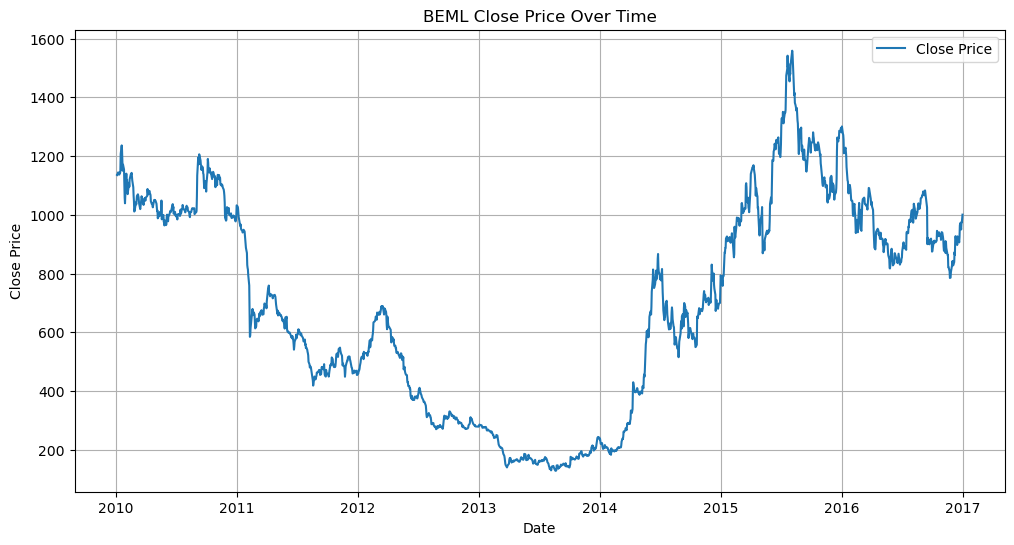

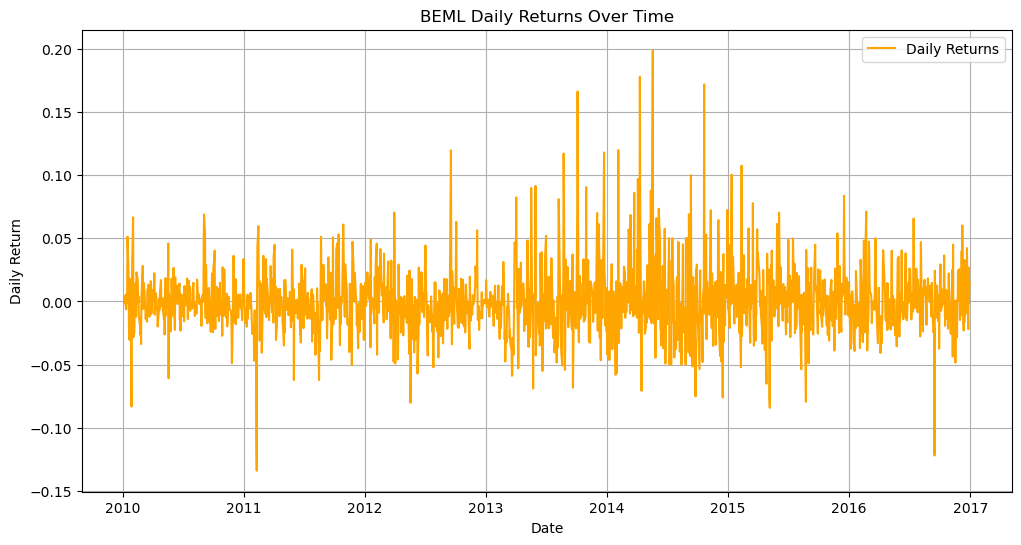

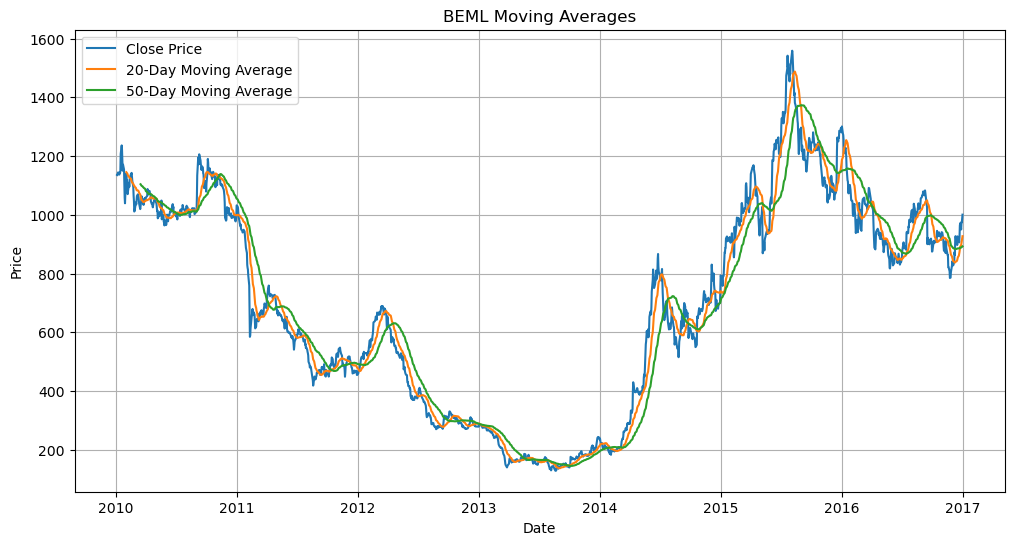


--- Analysis for GLAXO ---

Head:
         Date     Open     High      Low    Last    Close  \
0  2010-01-04  1613.00  1629.10  1602.00  1629.0  1625.65   
1  2010-01-05  1639.95  1639.95  1611.05  1620.0  1616.80   
2  2010-01-06  1618.00  1644.00  1617.00  1639.0  1638.50   
3  2010-01-07  1645.00  1654.00  1636.00  1648.0  1648.70   
4  2010-01-08  1650.00  1650.00  1626.55  1640.0  1639.80   

   Total Trade Quantity  Turnover (Lacs)  
0                9365.0           151.74  
1               38148.0           622.58  
2               36519.0           595.09  
3               12809.0           211.00  
4               28035.0           459.11  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1739 non-null   object 
 1   Open                  1739 non-null   float64
 2   High              

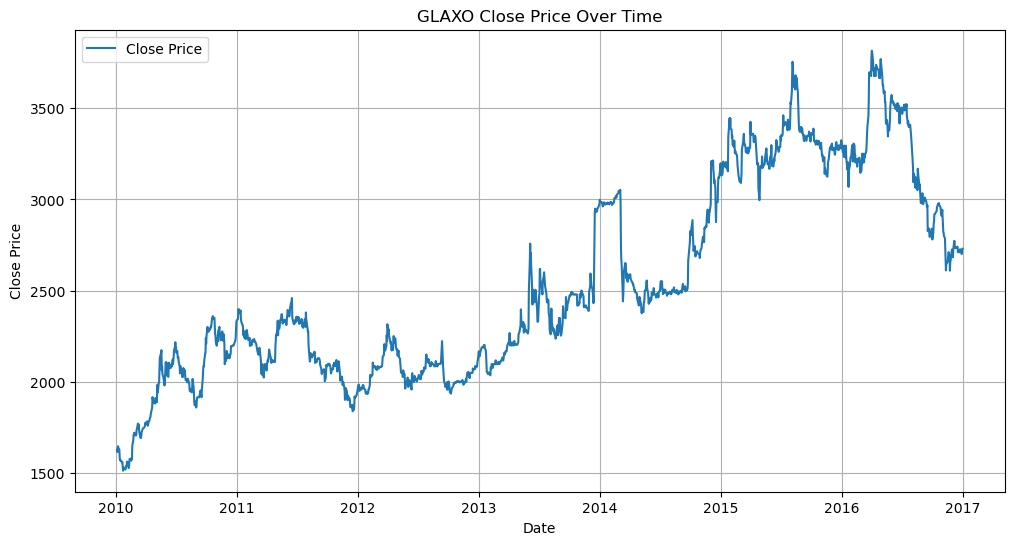

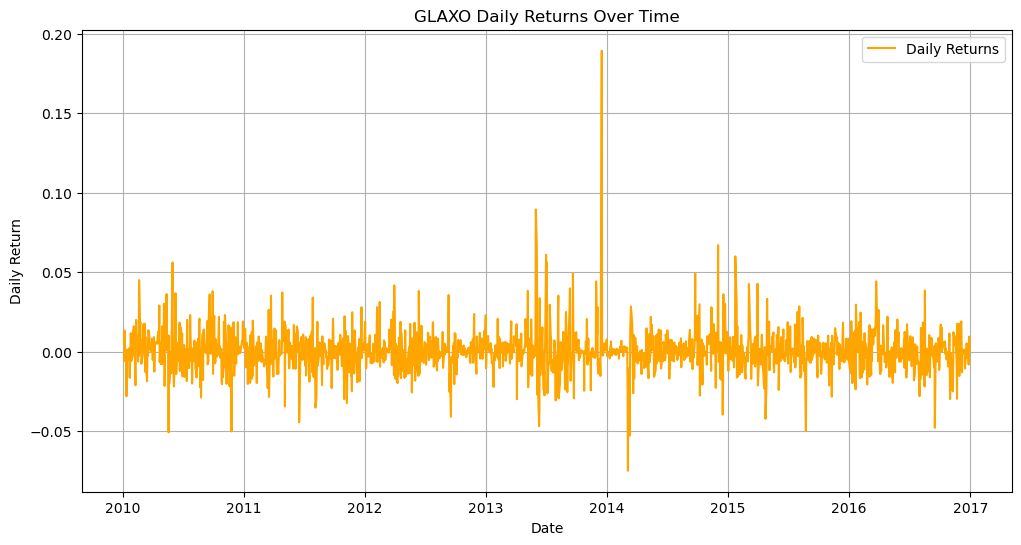

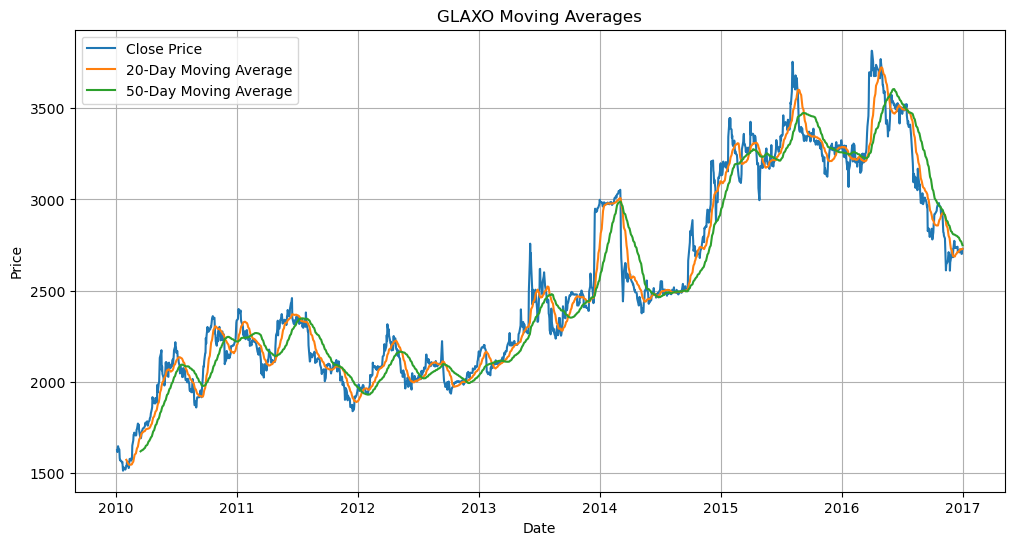


--- Risk Comparison ---
Standard Deviation of BEML Close Price: 357.43
Standard Deviation of GLAXO Close Price: 540.72
BEML is at lesser risk based on the standard deviation of its close price.

--- Question 2: BEML ETL Operations ---

BEML: Extracted Data (first 5 rows):
         Date    Open     High      Low    Last    Close  \
0  2010-01-04  1121.0  1151.00  1121.00  1134.0  1135.60   
1  2010-01-05  1146.8  1149.00  1128.75  1135.0  1134.60   
2  2010-01-06  1140.0  1164.25  1130.05  1137.0  1139.60   
3  2010-01-07  1142.0  1159.40  1119.20  1141.0  1144.15   
4  2010-01-08  1156.0  1172.00  1140.00  1141.2  1144.05   

   Total Trade Quantity  Turnover (Lacs)  
0              101651.0          1157.18  
1               59504.0           676.47  
2              128908.0          1482.84  
3              117871.0          1352.98  
4              170063.0          1971.42  

BEML: Feature Engineered Data (Date as index, first 5 rows):
              Open     High      Low    Last 

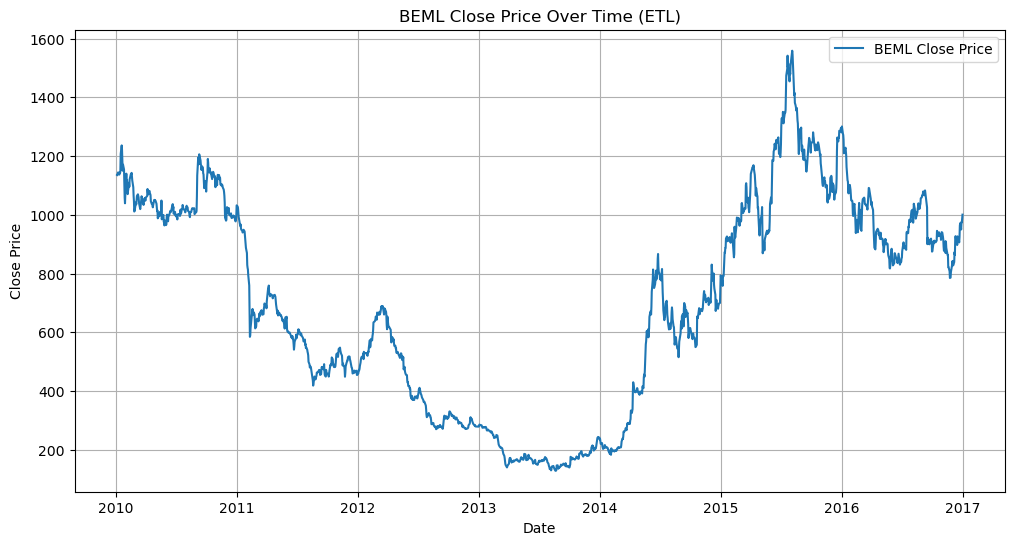


--- Question 3: GLAXO ETL Operations ---

GLAXO: Extracted Data (first 5 rows):
         Date     Open     High      Low    Last    Close  \
0  2010-01-04  1613.00  1629.10  1602.00  1629.0  1625.65   
1  2010-01-05  1639.95  1639.95  1611.05  1620.0  1616.80   
2  2010-01-06  1618.00  1644.00  1617.00  1639.0  1638.50   
3  2010-01-07  1645.00  1654.00  1636.00  1648.0  1648.70   
4  2010-01-08  1650.00  1650.00  1626.55  1640.0  1639.80   

   Total Trade Quantity  Turnover (Lacs)  
0                9365.0           151.74  
1               38148.0           622.58  
2               36519.0           595.09  
3               12809.0           211.00  
4               28035.0           459.11  

GLAXO: Feature Engineered Data (Date as index, first 5 rows):
               Open     High      Low    Last    Close  Total Trade Quantity  \
Date                                                                           
2010-01-04  1613.00  1629.10  1602.00  1629.0  1625.65                9

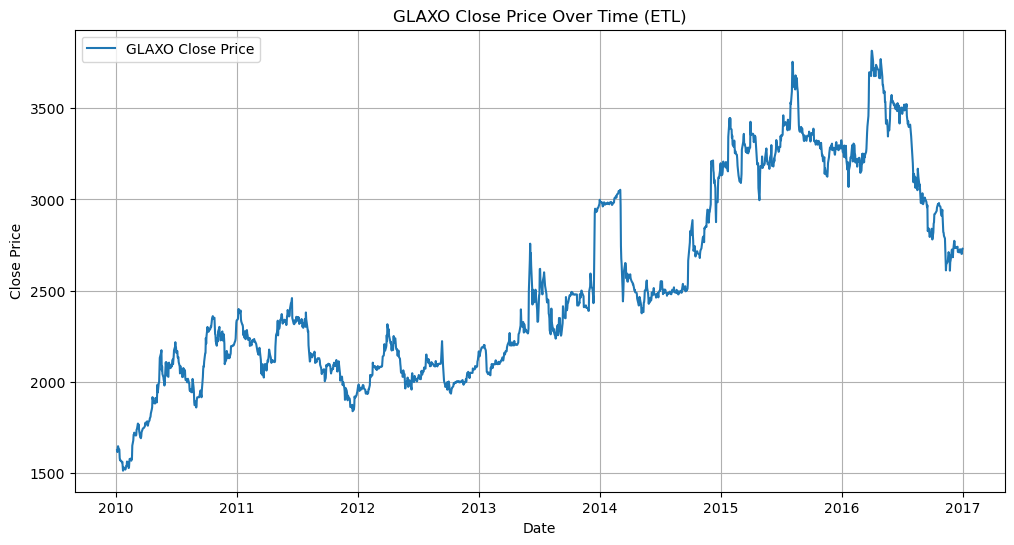

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Question 1: Risk Analysis and 12 Sub-tasks ---

# 1. Load the data
df_beml = pd.read_csv('BEML.csv')
df_glaxo = pd.read_csv('GLAXO.csv')

# Function to perform the 12 assumed sub-tasks
def perform_stock_analysis(df, stock_name):
    print(f"\n--- Analysis for {stock_name} ---")

    # 2. Display basic information
    print("\nHead:")
    print(df.head())
    print("\nInfo:")
    print(df.info())
    print("\nDescribe:")
    print(df.describe())

    # 3. Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # 4. Convert 'Date' to datetime objects
    df['Date'] = pd.to_datetime(df['Date'])

    # 5. Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # 6. Calculate daily returns
    df['Daily_Return'] = df['Close'].pct_change()

    # 7. Calculate cumulative returns
    df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1

    # 8. Calculate moving averages (e.g., 20-day and 50-day)
    df['20_Day_MA'] = df['Close'].rolling(window=20).mean()
    df['50_Day_MA'] = df['Close'].rolling(window=50).mean()

    # 9. Calculate volatility (standard deviation of daily returns)
    volatility = df['Daily_Return'].std()
    print(f"\nVolatility (Standard Deviation of Daily Returns): {volatility:.4f}")

    # 10. Plot 'Close' price over time
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price')
    plt.title(f'{stock_name} Close Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{stock_name}_close_price_plot.png')
    plt.show()

    # 11. Plot daily returns
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Daily_Return'], label='Daily Returns', color='orange')
    plt.title(f'{stock_name} Daily Returns Over Time')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{stock_name}_daily_returns_plot.png')
    plt.show()

    # 12. Plot moving averages
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price')
    plt.plot(df.index, df['20_Day_MA'], label='20-Day Moving Average')
    plt.plot(df.index, df['50_Day_MA'], label='50-Day Moving Average')
    plt.title(f'{stock_name} Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{stock_name}_moving_averages_plot.png')
    plt.show()

    return df

# Perform analysis for BEML
df_beml_analyzed = perform_stock_analysis(df_beml.copy(), 'BEML')

# Perform analysis for GLAXO
df_glaxo_analyzed = perform_stock_analysis(df_glaxo.copy(), 'GLAXO')

# Calculate and compare risk (standard deviation of 'Close' price)
std_beml = df_beml_analyzed['Close'].std()
std_glaxo = df_glaxo_analyzed['Close'].std()

print(f"\n--- Risk Comparison ---")
print(f"Standard Deviation of BEML Close Price: {std_beml:.2f}")
print(f"Standard Deviation of GLAXO Close Price: {std_glaxo:.2f}")

if std_beml < std_glaxo:
    print("BEML is at lesser risk based on the standard deviation of its close price.")
elif std_glaxo < std_beml:
    print("GLAXO is at lesser risk based on the standard deviation of its close price.")
else:
    print("Both stocks have similar risk levels based on the standard deviation of their close prices.")

# --- Question 2: BEML ETL Operations ---
print("\n--- Question 2: BEML ETL Operations ---")

# a) Perform extract operation (already done above when loading df_beml)
df_beml_etl = pd.read_csv('BEML.csv')
print("\nBEML: Extracted Data (first 5 rows):")
print(df_beml_etl.head())

# b) Perform feature engineering operation
df_beml_etl['Date'] = pd.to_datetime(df_beml_etl['Date'])
df_beml_etl.set_index('Date', inplace=True)
print("\nBEML: Feature Engineered Data (Date as index, first 5 rows):")
print(df_beml_etl.head())

# c) Calculate the gain attribute using close attribute
df_beml_etl['Gain'] = df_beml_etl['Close'].pct_change() * 100 # Percentage gain
print("\nBEML: Gain Attribute Calculated (first 5 rows):")
print(df_beml_etl.head())

# d) Display the close attribute in time plot
plt.figure(figsize=(12, 6))
plt.plot(df_beml_etl.index, df_beml_etl['Close'], label='BEML Close Price')
plt.title('BEML Close Price Over Time (ETL)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.savefig('BEML_close_price_etl_plot.png')
plt.show()


# --- Question 3: GLAXO ETL Operations ---
print("\n--- Question 3: GLAXO ETL Operations ---")

# a) Perform extract operation (already done above when loading df_glaxo)
df_glaxo_etl = pd.read_csv('GLAXO.csv')
print("\nGLAXO: Extracted Data (first 5 rows):")
print(df_glaxo_etl.head())

# b) Perform feature engineering operation
df_glaxo_etl['Date'] = pd.to_datetime(df_glaxo_etl['Date'])
df_glaxo_etl.set_index('Date', inplace=True)
print("\nGLAXO: Feature Engineered Data (Date as index, first 5 rows):")
print(df_glaxo_etl.head())

# c) Calculate the gain attribute using close attribute
df_glaxo_etl['Gain'] = df_glaxo_etl['Close'].pct_change() * 100 # Percentage gain
print("\nGLAXO: Gain Attribute Calculated (first 5 rows):")
print(df_glaxo_etl.head())

# d) Display the close attribute in time plot
plt.figure(figsize=(12, 6))
plt.plot(df_glaxo_etl.index, df_glaxo_etl['Close'], label='GLAXO Close Price')
plt.title('GLAXO Close Price Over Time (ETL)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.savefig('GLAXO_close_price_etl_plot.png')
plt.show()

# Save the processed dataframes to CSV
df_beml_analyzed.to_csv('BEML_analyzed.csv')
df_glaxo_analyzed.to_csv('GLAXO_analyzed.csv')
df_beml_etl.to_csv('BEML_etl_processed.csv')
df_glaxo_etl.to_csv('GLAXO_etl_processed.csv')